<a href="https://colab.research.google.com/github/ssingh55/colab/blob/main/Gemini_Pro_with_LangChain_on_Google_AI_Studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install all packages required for langchain and google generative ai
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai
!pip -q install "langchain[docarray]"

In [ ]:
#@title Check if the langchain packages are installed
!pip show langchain langchain-core

Name: langchain
Version: 0.0.353
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-experimental
---
Name: langchain-core
Version: 0.1.4
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, jsonpatch, langsmith, packaging, pydantic, PyYAML, requests, tenacity
Required-by: langchain, langchain-community, langchain-experimental, langchain-google-genai


**Setting up the Auth**

In [ ]:
#@title Setting up the Auth
import os
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

if "GOOGLE_API_KEY" not in os.environ:
  os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_AI_STUDIO2')

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [ ]:
#@title List all models of generative ai
models = [m for m in genai.list_models()]
models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

In [ ]:
#@title Generate text
prompt = "Who are you and what can you do?"

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)

Markdown(response.text)

I am a large language model, trained by Google.

I can do many things, including:

* **Answer your questions:** I have been trained on a massive amount of text data, so I can answer a wide range of questions on a variety of topics.
* **Generate text:** I can generate different types of text, including stories, poems, articles, and code.
* **Translate languages:** I can translate text between over 100 different languages.
* **Summarize text:** I can summarize long pieces of text into shorter, more concise summaries.
* **Write different kinds of creative content:** I can write sonnets, song lyrics, scripts, jokes, and more.
* **Help with tasks:** I can help you with tasks like planning a trip, writing a resume, or finding information on the web.

I am still under development, but I am learning new things every day. I am excited to see what I can accomplish in the future.

Here are some additional things I can do:

* **Solve math problems:** I can solve a wide range of math problems, from basic arithmetic to calculus.
* **Play games:** I can play many different games, including chess, checkers, and trivia.
* **Write different styles of text:** I can write in different styles, such as formal, informal, and academic.
* **Generate images:** I can generate images from text descriptions.
* **Answer questions in different languages:** I can answer questions in over 100 different languages.

I am always learning and growing, and I am excited to see what new things I can learn in the future.

Google's Gemini with LangChain

Basic LLM Chain

In [ ]:
#@title Basic LLM Chain
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.7)

result = llm.invoke("What is a LLM?")

Markdown(result.content)

A LLM, or Large Language Model, is a type of artificial intelligence (AI) that has been trained on a massive amount of text data. This training allows LLMs to understand and generate human language, including text, code, and even poetry. LLMs are often used for natural language processing (NLP) tasks such as:

* **Text summarization:** LLMs can be used to summarize large amounts of text, such as news articles or scientific papers, into a more concise and readable format.
* **Machine translation:** LLMs can be used to translate text from one language to another.
* **Chatbots:** LLMs can be used to create chatbots that can interact with humans in a natural way.
* **Code generation:** LLMs can be used to generate code in a variety of programming languages.
* **Creative writing:** LLMs can be used to generate creative writing, such as stories, poems, and songs.

LLMs are still under development, but they have the potential to revolutionize the way we interact with computers and with each other.

Here are some additional details about LLMs:

* LLMs are typically trained on billions or even trillions of words of text.
* LLMs are able to learn the structure and grammar of human language, as well as the meaning of words and phrases.
* LLMs can be used to generate text that is indistinguishable from human-generated text.
* LLMs are still prone to errors, such as generating text that is factually incorrect or offensive.

Despite these limitations, LLMs are a powerful tool that has the potential to be used for a wide variety of applications.

In [ ]:
#@title streaming the data
for chunk in llm.stream("Write a haiku about LLMs."):
  print(chunk.content)
  print("---")

Vast language blooms,
thoughts dance on digital waves,
a new world of
---
 words.
---


Basic Multi Chain

In [ ]:
#@title Basic MultiChain model import
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

model = ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.7)

In [ ]:
#@title Use ChatPromptTemplate to get the output
prompt = ChatPromptTemplate.from_template("Tell me a short joke about Tiger")

output_parser = StrOutputParser()

In [ ]:
#@title Use multi chain model
chain = prompt | model | output_parser

In [ ]:
#@title Use the chain model
chain.invoke({"topic":"machine learning"})

'Why was Tiger Woods disqualified from the Masters?\n\nBecause he was caught green-handed.'

More Complicated Chain - Mini RAG

In [ ]:
#@title Import multichain complicated model
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

In [ ]:
#@title Use chatgoogle generative ai model
model = ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.7)

In [ ]:
#@title Use google generative ai embeddings model
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

vectorstore = DocArrayInMemorySearch.from_texts(
    #mini docs for embedding
    ["Gemini Pro is a Large Language Model was made by GoogleDeepMind",
     "Gemini can be either a star sign or a name of a series of language models",
     "A Language model is trained by predicting the next token",
     "LLMs can easily do a variety of NLP tasks as well as text generation"],

    embedding=embeddings #passing in the embedder model
)

retriever = vectorstore.as_retriever()

In [ ]:
retriever.get_relevant_documents("What is Gemini?")

[Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [ ]:
retriever.get_relevant_documents("What is Gemini pro?")

[Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind')]

In [ ]:
template = """Answer the question as a full sentence, based only on the following context:
{context}

Return you answer as JSON
Return you answer as three back ticks

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain.schema.runnable import RunnableMap

In [ ]:
retriever.get_relevant_documents("Who made gemini pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [ ]:
chain = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
    }) | prompt | model | output_parser

In [ ]:
chain.invoke({"question": "Who made Gemini Pro?"})

'```json\n{\n "answer": "Gemini Pro was made by GoogleDeepMind."\n}\n```'

PAL Chain

In [ ]:
from langchain_experimental.pal_chain import PALChain

from langchain.chains.llm import LLMChain

ModuleNotFoundError: ignored

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",temperature=0)

In [ ]:
pal_chain = PALChain.from_math_prompt(model,verbose=True)

NameError: ignored

In [ ]:
question = "The cafeteria had 23 apples. \
If they used 20 for lunch and bought 6 more,\
how many apples do they have?"

In [ ]:
#@title Call pal chain to invoke question
pal_chain.invoke(question)

NameError: ignored

In [ ]:
#@title Input your question
question = "If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minute to get ready\
and walk to school, at what time will you get to school?"

pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minute to get readyand walk to school, at what time will you get to school?"""
    wake_up_time = "7:00 a.m."
    time_to_get_ready = "1 hour and 30 minutes"
    school_arrival_time = "8:30 a.m."
    result = school_arrival_time
    return result

> Finished chain.


{'question': 'If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minute to get readyand walk to school, at what time will you get to school?',
 'result': '8:30 a.m.'}

Multi Modal

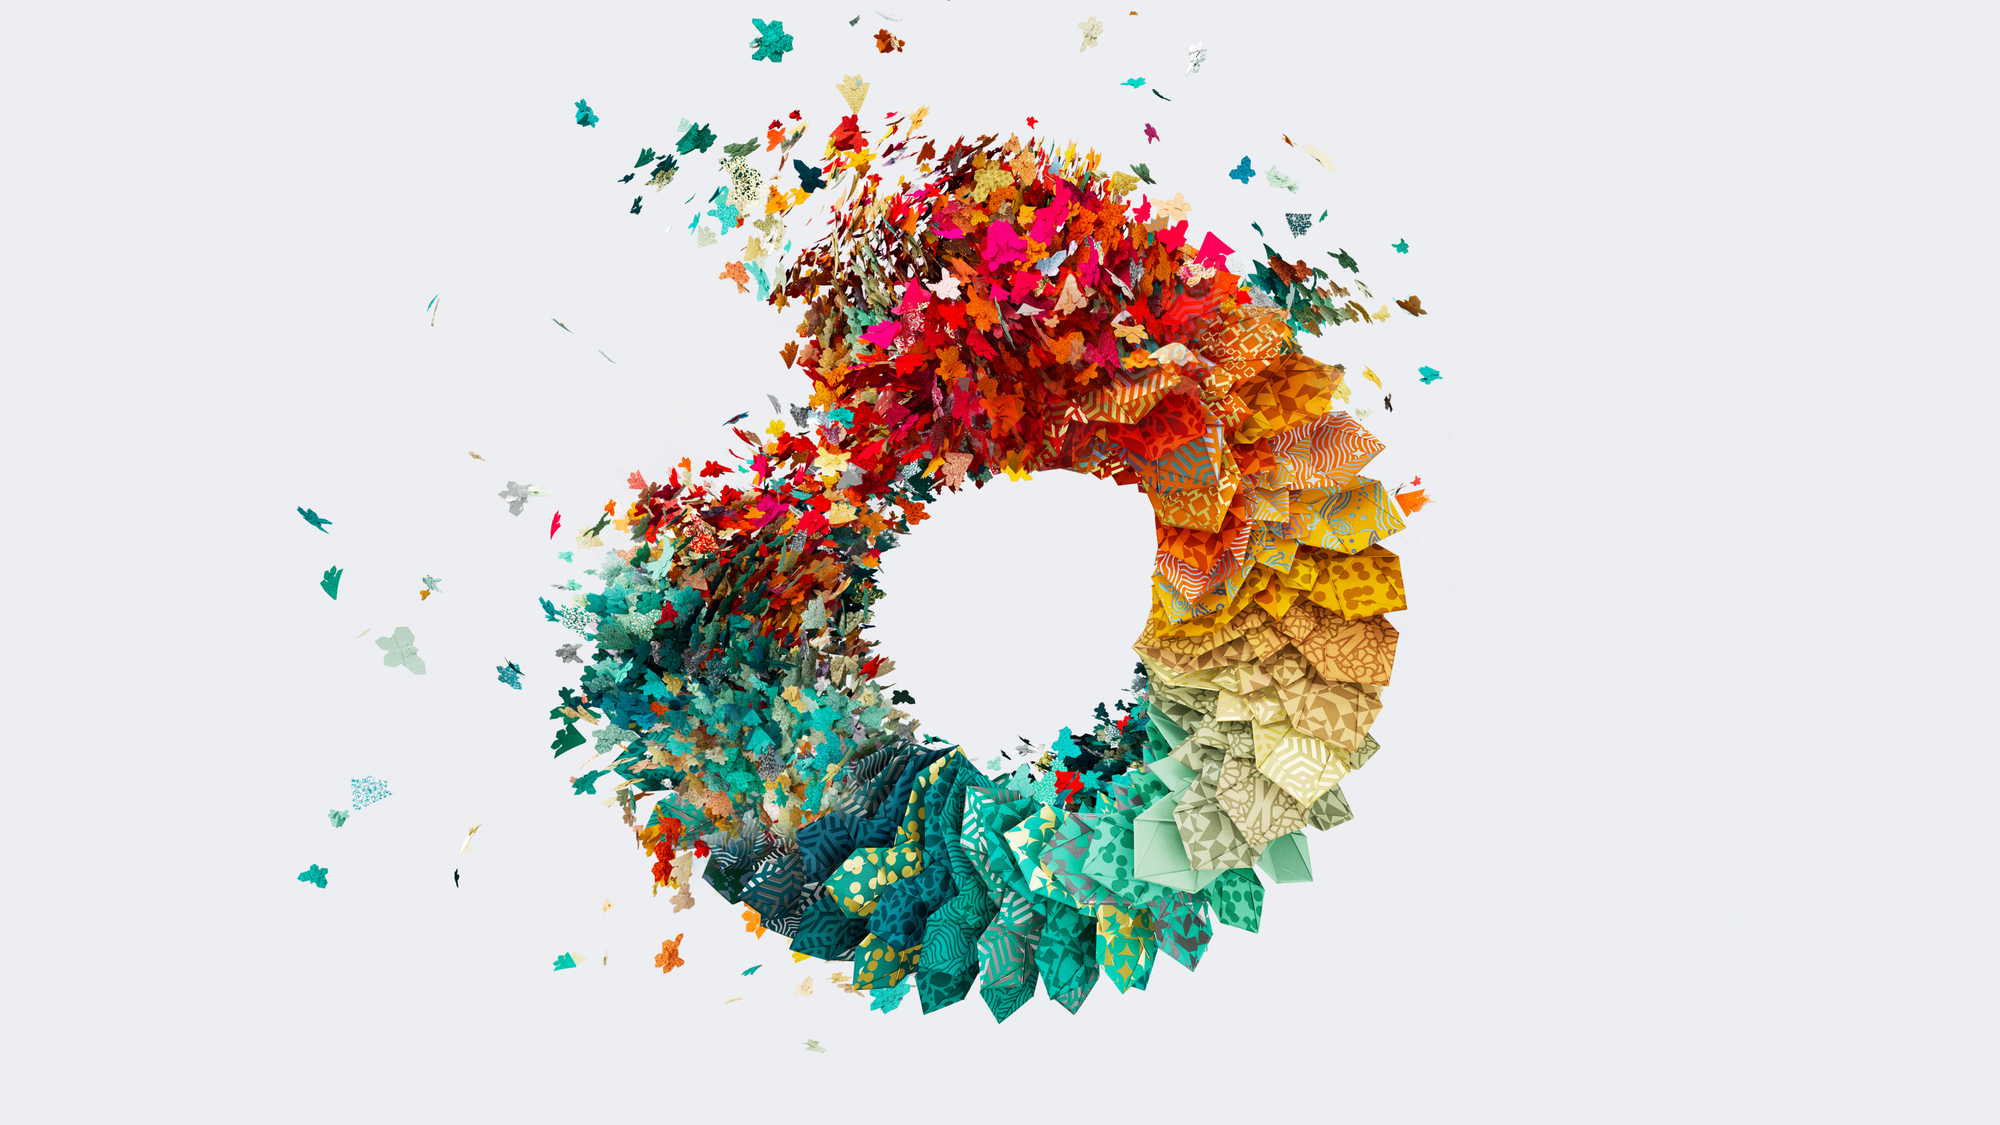

In [ ]:
#@title Import the image
import requests
from IPython.display import Image

image_url = "https://www.pacegallery.com/media/images/16_9-2.width-2000.png"
content = requests.get(image_url).content
Image(content,width=300)

In [ ]:
#@title Use langchain to import HumanMessage and ChatGoogleGenerativeAI
#describe the question
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

# example
message = HumanMessage(
    content=[
        {"type":"text",
         "text":"What's in this image and who lives there?",
         }, # You can optionally provide text parts
        {
            "type": "image_url",
            "image_url": image_url
        },
    ]
)

llm.invoke([message])

AIMessage(content=' This image is a 3D rendering of a wreath made of colorful leaves. The leaves are arranged in a circle and are of different colors, including red, orange, yellow, green, and blue. There is a white background. The wreath is made of paper.')